In [1]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
from tqdm import tqdm
from matplotlib import pyplot as plt
from statsmodels.stats.weightstats import ttest_ind
from tableone import TableOne

In [2]:
!cat student_data/student.txt

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "

Me: We'd like to figure out if extra educational support improves math scores.

In [3]:
df = pd.read_csv('student_data/student-mat.csv', sep = ";")
print(df.shape)
df.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
df.loc[:, ['G1', 'G2', 'G3']].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


In [7]:
df['schoolsup'].value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [8]:
# let's add an index/unique identifier
df = df.reset_index()

In [9]:
df.dtypes

index          int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [10]:
cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences']

In [11]:
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
                   'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in categorical_cols:
    print(col)
    print(df[col].value_counts())
    print("---------------------")

school
GP    349
MS     46
Name: school, dtype: int64
---------------------
sex
F    208
M    187
Name: sex, dtype: int64
---------------------
address
U    307
R     88
Name: address, dtype: int64
---------------------
famsize
GT3    281
LE3    114
Name: famsize, dtype: int64
---------------------
Pstatus
T    354
A     41
Name: Pstatus, dtype: int64
---------------------
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
---------------------
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
---------------------
reason
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
---------------------
guardian
mother    273
father     90
other      32
Name: guardian, dtype: int64
---------------------
schoolsup
no     344
yes     51
Name: schoolsup, dtype: int64
---------------------
famsup
yes    242
no     153
Name: famsup, dty

Me: The libraries I'm going to use require the data to be numbers, not strings. Let's fix these columns

In [12]:
super_key = {}

for col in tqdm(categorical_cols):
    onehot_key = {}
    counter = -1
    for idx, row in df.iterrows():
        if row[col] not in onehot_key:
            onehot_key[row[col]] = counter + 1
            counter += 1
    super_key[col] = onehot_key

super_key 

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 53.97it/s]


{'school': {'GP': 0, 'MS': 1},
 'sex': {'F': 0, 'M': 1},
 'address': {'U': 0, 'R': 1},
 'famsize': {'GT3': 0, 'LE3': 1},
 'Pstatus': {'A': 0, 'T': 1},
 'Mjob': {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4},
 'Fjob': {'teacher': 0, 'other': 1, 'services': 2, 'health': 3, 'at_home': 4},
 'reason': {'course': 0, 'other': 1, 'home': 2, 'reputation': 3},
 'guardian': {'mother': 0, 'father': 1, 'other': 2},
 'schoolsup': {'yes': 0, 'no': 1},
 'famsup': {'no': 0, 'yes': 1},
 'paid': {'no': 0, 'yes': 1},
 'activities': {'no': 0, 'yes': 1},
 'nursery': {'yes': 0, 'no': 1},
 'higher': {'yes': 0, 'no': 1},
 'internet': {'no': 0, 'yes': 1},
 'romantic': {'no': 0, 'yes': 1}}

In [13]:
for col in categorical_cols:
    df[col] = df[col].map(super_key[col])

In [14]:
ttest_ind(
    df.loc[df['schoolsup'] == 0, 'G1'],
    df.loc[df['schoolsup'] == 1, 'G1'],
    usevar = 'pooled'
)

(-4.313372609988965, 2.036142341969172e-05, 393.0)

Me: The 2nd value here is the p-value. It's some number with 4 zeros behind the decimal point, so it's a really small number. Given there is a statistically significant difference (at the 5% significance level), do you think that extra school support improved the math score on the 1st test?

In [15]:
cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences'] + categorical_cols

mytable = TableOne(df, columns = cols, categorical = categorical_cols, groupby = 'schoolsup')
print(mytable.tabulate(tablefmt="github"))

|                       |    | Missing   | Overall    | 0          | 1           |
|-----------------------|----|-----------|------------|------------|-------------|
| n                     |    |           | 395        | 51         | 344         |
| age, mean (SD)        |    | 0         | 16.7 (1.3) | 15.9 (1.0) | 16.8 (1.3)  |
| Medu, mean (SD)       |    | 0         | 2.7 (1.1)  | 2.6 (1.1)  | 2.8 (1.1)   |
| Fedu, mean (SD)       |    | 0         | 2.5 (1.1)  | 2.6 (1.1)  | 2.5 (1.1)   |
| traveltime, mean (SD) |    | 0         | 1.4 (0.7)  | 1.4 (0.8)  | 1.5 (0.7)   |
| studytime, mean (SD)  |    | 0         | 2.0 (0.8)  | 2.1 (0.8)  | 2.0 (0.8)   |
| failures, mean (SD)   |    | 0         | 0.3 (0.7)  | 0.3 (0.7)  | 0.3 (0.7)   |
| famrel, mean (SD)     |    | 0         | 3.9 (0.9)  | 3.9 (0.8)  | 3.9 (0.9)   |
| freetime, mean (SD)   |    | 0         | 3.2 (1.0)  | 3.1 (1.1)  | 3.3 (1.0)   |
| goout, mean (SD)      |    | 0         | 3.1 (1.1)  | 3.0 (1.2)  | 3.1 (1.1)   |
| Da

Me: the table above shows that there wasn't a random assignment. So you can't be sure that extra school support caused the difference in math scores, rather than a romantic interest (or lack thereof).

Let's do some propensity score matching. Now I'm going to assume that conditional independence, meaning that math scores are independent of whether a student received extra school support conditioned on the other covariates.

With that assumption, we could try to match covariates together to create a sample of comparable groups, for example group 1 received extra support and is on average 16.7 years old, a study time of 2 hours, ..., etc. and group 2 did not receive extra support but was composed of students on average 16.7 years old, ..., etc.

The problem with matching is that there's a lot of variables to match on. So rather than matching on these variables, I'll match on the probability of receiving extra school support (a.k.a. the propensity). The probability of receving extra school support is just 1 column and would be much easier to match on.

Let's do that.

In [16]:
psm = PsmPy(df, treatment='schoolsup', indx = 'index', exclude = ['G1', 'G2', 'G3'])

In [17]:
psm.logistic_ps(balance = True)

Me: here I used logistic regression, although you could use algorithm you'd like (e.g. Random Forest) that gives good propensities.

In [18]:
psm.predicted_data

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,propensity_score,propensity_logit,schoolsup
0,0,0,0,18,0,0,0,4,4,0,...,4,3,4,1,1,3,6,0.327184,-0.720948,0
1,2,0,0,15,0,1,1,1,1,0,...,4,3,2,2,3,3,10,0.293291,-0.879452,0
2,7,0,0,17,0,0,0,4,4,2,...,4,1,4,1,1,1,6,0.234721,-1.181841,0
3,17,0,0,16,0,0,1,3,3,2,...,5,3,2,1,1,4,4,0.136553,-1.844224,0
4,24,0,0,15,1,0,1,2,4,3,...,4,3,2,1,1,5,2,0.130150,-1.899629,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,1,1,20,0,1,0,2,2,3,...,5,5,4,4,5,4,11,0.842841,1.679517,1
391,391,1,1,17,0,1,1,3,1,3,...,2,4,5,3,4,2,3,0.990602,4.657843,1
392,392,1,1,21,1,0,1,1,1,2,...,5,5,3,3,3,3,3,0.996060,5.532513,1
393,393,1,1,18,1,1,1,3,2,3,...,4,4,1,3,4,5,0,0.981377,3.964533,1


In [19]:
psm.predicted_data['propensity_score'].describe()

count    395.000000
mean       0.646646
std        0.238382
min        0.110888
25%        0.455694
50%        0.688211
75%        0.842820
max        0.996060
Name: propensity_score, dtype: float64

In [20]:
psm.predicted_data['propensity_score'].std()

0.23838162523842332

Me: I thought about using a caliper, matching records that were only really similar to other records, but later decided not to try this.

In [28]:
psm.knn_matched(matcher='propensity_logit', replacement=False)

C:\Users\mwtichen\anaconda3\lib\site-packages\psmpy\psmpy.py:346: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


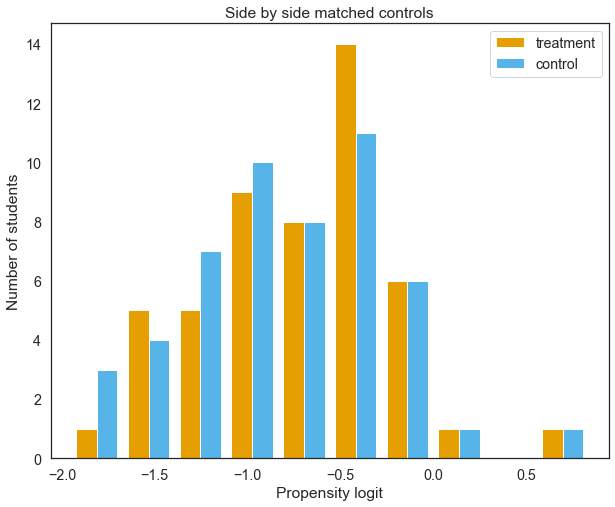

In [29]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of students', Xlabel= 'Propensity logit',names = ['treatment', 'control'],save=True)

In [30]:
psm.df_matched

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,propensity_score,propensity_logit,schoolsup
0,0,0,0,18,0,0,0,4,4,0,...,4,3,4,1,1,3,6,0.327184,-0.720948,0
1,2,0,0,15,0,1,1,1,1,0,...,4,3,2,2,3,3,10,0.293291,-0.879452,0
2,7,0,0,17,0,0,0,4,4,2,...,4,1,4,1,1,1,6,0.234721,-1.181841,0
3,17,0,0,16,0,0,1,3,3,2,...,5,3,2,1,1,4,4,0.136553,-1.844224,0
4,24,0,0,15,1,0,1,2,4,3,...,4,3,2,1,1,5,2,0.130150,-1.899629,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,0,0,16,1,0,1,4,4,1,...,2,4,4,2,3,4,6,0.366026,-0.549302,1
97,16,0,0,16,0,0,1,4,4,3,...,3,2,3,1,2,2,6,0.370772,-0.528906,1
98,332,0,0,18,0,0,1,3,3,3,...,5,3,4,1,1,4,0,0.382261,-0.479960,1
99,86,0,0,16,0,1,1,2,2,0,...,4,3,4,1,2,2,4,0.391024,-0.443010,1


In [31]:
psm.matched_ids

,index,matched_ID
0,0,145
1,2,152
2,7,40
3,17,1
4,24,174
5,28,79
6,38,284
7,39,221
8,43,127
9,44,204


In [32]:
mask = df['index'].isin(psm.matched_ids['index'].dropna().tolist() + psm.matched_ids['matched_ID'].dropna().tolist())

mytable = TableOne(df.loc[mask,:], columns = cols, categorical = categorical_cols, groupby = 'schoolsup')
print(mytable.tabulate(tablefmt="github"))

|                       |    | Missing   | Overall     | 0          | 1          |
|-----------------------|----|-----------|-------------|------------|------------|
| n                     |    |           | 102         | 51         | 51         |
| age, mean (SD)        |    | 0         | 16.1 (1.1)  | 15.9 (1.0) | 16.4 (1.1) |
| Medu, mean (SD)       |    | 0         | 2.6 (1.1)   | 2.6 (1.1)  | 2.5 (1.1)  |
| Fedu, mean (SD)       |    | 0         | 2.6 (1.1)   | 2.6 (1.1)  | 2.6 (1.1)  |
| traveltime, mean (SD) |    | 0         | 1.4 (0.7)   | 1.4 (0.8)  | 1.3 (0.5)  |
| studytime, mean (SD)  |    | 0         | 2.1 (0.8)   | 2.1 (0.8)  | 2.1 (0.7)  |
| failures, mean (SD)   |    | 0         | 0.4 (0.8)   | 0.3 (0.7)  | 0.5 (0.9)  |
| famrel, mean (SD)     |    | 0         | 4.0 (0.8)   | 3.9 (0.8)  | 4.0 (0.8)  |
| freetime, mean (SD)   |    | 0         | 3.2 (1.0)   | 3.1 (1.1)  | 3.2 (0.8)  |
| goout, mean (SD)      |    | 0         | 3.1 (1.1)   | 3.0 (1.2)  | 3.1 (1.1)  |
| Da

Me: if you clook closely, you'll notice some differences. The issue here is the small amount of data, not propensity score matching. moving on...

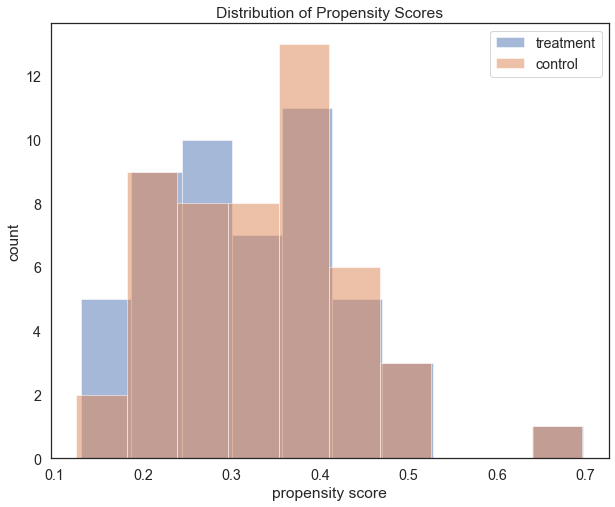

In [33]:
plt.hist(psm.df_matched.loc[psm.df_matched['index'].isin(psm.matched_ids['index']), 'propensity_score'], 
         alpha=0.5, # the transaparency parameter
         label='treatment')
  
plt.hist(psm.df_matched.loc[psm.df_matched['index'].isin(psm.matched_ids['matched_ID']), 'propensity_score'], 
         alpha=0.5, # the transaparency parameter
         label='control')
  
plt.legend(loc='upper right')
plt.ylabel('count')
plt.xlabel('propensity score')
plt.title('Distribution of Propensity Scores')
plt.show()

Me: Above is another plot comparing propensity scores.

With our similar groups, we can now estimate the average treatment effect (of the treated) with a t-test on the matched data.

In [27]:
ttest_ind(
    df.loc[df['index'].isin(psm.matched_ids['index']), 'G1'],
    df.loc[df['index'].isin(psm.matched_ids['matched_ID']), 'G1'],
    usevar = 'pooled'
)

(-1.2944281723308118, 0.19849870775465878, 100.0)

Me: The p-value this time is roughly 0.2. The difference in grades for students receiving extra support is not statistically significant (at the 5% level).